# [프로젝트2] 작성한 코드 모듈화 및 테스트하기

## 프로젝트 목표
---
- Jupyter Notebook 으로 완성한 코드를 클래스화(모듈화) 하고, 이를 테스트

## 프로젝트 목차
---

1. **데이터 읽기:** 철근 가격 데이터 읽기 및 DataFrame 생성

2. **데이터셋 생성:** src 라이브러리의 Datasets 클래스로 데이터셋 생성

3. **모델 훈련:** train() 함수로 훈련

4. **훈련 결과 시각화:** 모델의 훈련(손실) 결과 시각화

5. **검증 및 시각화:** Data Loader로 검증 결과 도출 및 결과 시각화

## 1. 데이터 읽기

### 1.1 필요한 라이브러리 import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import importlib
import src
# src.py 파일 불러와
import warnings

# 라이브러리 reload
importlib.reload(src)

# Unicode warning 제거 (폰트 관련 경고메시지)
plt.rcParams['axes.unicode_minus']=False

# 한글 폰트 설정
# plt.rcParams['font.family'] = "AppleGothic"
plt.rcParams['font.family'] = "NanumGothic"

# 경고 메시지 출력 안함
warnings.filterwarnings('ignore')

# DataFrame 소수점 이하 4째자리까지 표현
pd.set_option('display.float_format', lambda x: f'{x:.4f}') 

### 1.2 데이터 불러오기

데이터는 '/mnt/elice/dataset' 에 위치해있으며, 파일명은 '전처리Data.xlsx' 입니다. (파일명에서도 나타나있듯, xlsx 확장자를 갖습니다.)

In [2]:
import glob

glob.glob('/mnt/elice/dataset/*')
# 파일 위치 확인

['/mnt/elice/dataset/전처리Data.xlsx']

In [3]:
# 데이터 읽기 (DataFrame)
df = pd.read_excel(r'/mnt/elice/dataset/전처리Data.xlsx')

# Shape 확인
print(df.shape)
df.head()

(937, 13)


,Date,고철 중량A (구좌업체매입가) [한국(국내가)] 현물KRW/ton,고철 H2 [일본(FOB)] 현물KRW/ton,고철 HMS No.1 [미국(한국 CFR)] 현물KRW/ton,철근 고장력 HD10mm [한국(출고가)] 현물KRW/ton,철근 고장력 HD10mm [한국(국내 중국산)] 현물KRW/ton,철근 고장력 HD10mm [한국(1차 유통가)] 현물KRW/ton,판매량(천톤),재고량(천톤),"허가 면적(철근)(단위 : 1,000 ㎡)","착공 면적(철근)(단위 : 1,000 ㎡)",동절기,장마기
0,2013-01-04,42.5000,45.0100,47.5700,77.0000,64.0000,69.0000,662,317,12.4700,10.2500,1,0
1,2013-01-07,42.5000,43.9100,46.1800,75.0000,64.0000,69.0000,662,317,12.4700,10.2500,1,0
2,2013-01-11,43.5000,44.4400,47.2700,75.0000,64.0000,69.0000,662,317,12.4700,10.2500,1,0
3,2013-01-14,43.5000,45.3700,45.7400,75.0000,64.0000,69.0000,662,317,12.4700,10.2500,1,0
4,2013-01-18,42.3000,46.7200,47.2500,75.0000,64.0000,69.0000,662,317,12.4700,10.2500,1,0


## 2. DataSets로 데이터셋 생성

#### **[TODO]** src.py 파일에 정의된 DataSets() 클래스를 활용해서 데이터셋을 로드합니다.
- 원본 데이터: `df`
- 예측 목표 컬럼: `'철근 고장력 HD10mm [한국(출고가)] 현물KRW/ton'`
- 배치 크기: 32
- window 크기: 6

In [5]:
# src.py 파일에 정의된 DataSets() 클래스를 활용해서 Dataset을 생성합니다.
dataset = src.DataSets(df, '철근 고장력 HD10mm [한국(출고가)] 현물KRW/ton')
'''
class DataSets():
    def __init__(self, df, target_column, window_size=6, split_days=45, batch_size=32, device='cpu')
'''

"\nclass DataSets():\n    def __init__(self, df, target_column, window_size=6, split_days=45, batch_size=32, device='cpu')\n"

#### **[TODO]** Dataset 클래스의 get_test_loader(), get_train_loader() 메서드를 활용해서 train, test 데이터 로더를 생성합니다.

In [10]:
# train, test 데이터 로더를 생성해서 각 변수에 할당해주세요.
train_loader = dataset.get_train_loader()
test_loader = dataset.get_test_loader()

In [11]:
# 1개 배치 추출
x, y = next(iter(train_loader))

In [12]:
# 추출된 데이터 shape
x.shape, y.shape

(torch.Size([32, 6, 1]), torch.Size([32]))

## 3. 모델 훈련

In [13]:
import torch

# device 설정 (cuda 혹은 cpu)
# 여기서는 CPU를 사용.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [14]:
# 모델 훈련 (src.train 함수)
losses, model = src.train(train_loader, num_epochs=1000, device=device)

epoch: 1, loss: 2.9893
epoch: 101, loss: 0.1587
epoch: 201, loss: 0.0616
epoch: 301, loss: 0.0507
epoch: 401, loss: 0.0509
epoch: 501, loss: 0.0509
epoch: 601, loss: 0.0509
epoch: 701, loss: 0.0509
epoch: 801, loss: 0.0509
epoch: 901, loss: 0.0509


학습을 완료한 모델의 구조를 확인합니다.

In [15]:
model

LSTMModel(
  (lstm): LSTM(1, 32, batch_first=True)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)

#### **[TODO]** 모델의 성능을 높이기 위해, 모델의 구조와 관련된 하이퍼파라미터를 변경한 다른 모델을 정의해 봅시다.
- 입력 크기: 1
- 은닉층 크기: 128
- 출력 크기: 1
- 레이어 수: 2
- `bidirectional=True`

In [16]:
# 하이퍼파라미터를 변경한 모델을 정의합니다.
model2 = src.LSTMModel(input_size=1, 
                       hidden_size=128, 
                       output_size=1, 
                       num_layers=2, 
                       bidirectional=True)

- src.train 함수를 통해 `model2` 모델을 학습 데이터에 대해 훈련하고, 훈련이 완료된 모델을 다시 `model2` 에 저장합니다.
    - epoch는 1000으로 설정합니다.

In [17]:
# 재학습
losses2, model2 = src.train(train_loader, num_epochs=1000, device=device, model=model2)

epoch: 1, loss: 1.2576
epoch: 101, loss: 0.0520
epoch: 201, loss: 0.0523
epoch: 301, loss: 0.0523
epoch: 401, loss: 0.0521
epoch: 501, loss: 0.0519
epoch: 601, loss: 0.0516
epoch: 701, loss: 0.0501
epoch: 801, loss: 0.0496
epoch: 901, loss: 0.0495


## 4. 훈련 결과 시각화

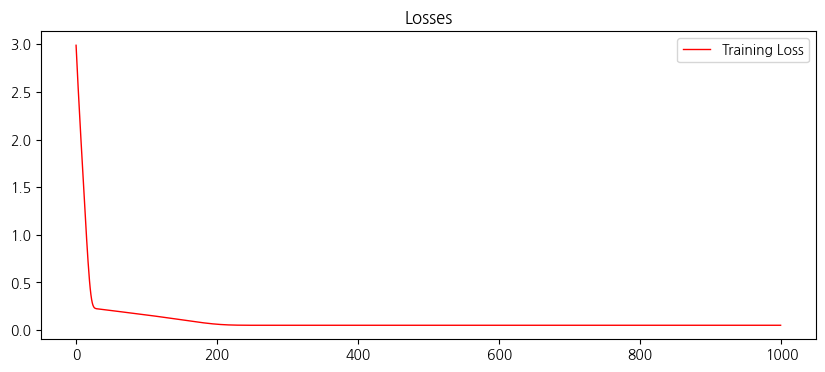

In [18]:
# 학습/검증 손실 시각화
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10, 4)
ax.plot(losses, color='red', linewidth=1.0, label='Training Loss')
ax.set_title('Losses')
ax.legend()
plt.show()

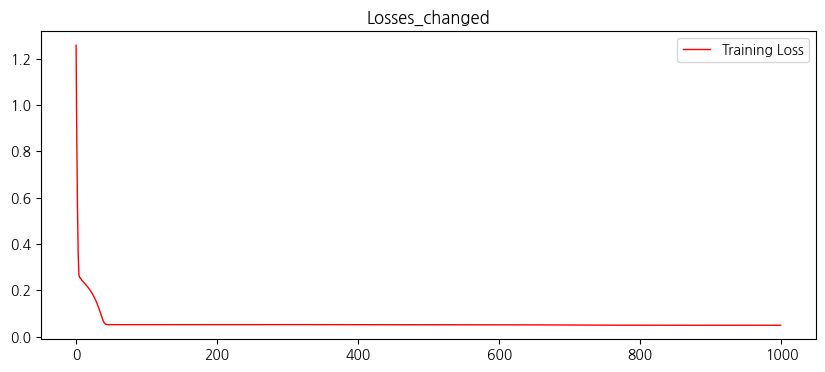

In [19]:
# 학습/검증 손실 시각화
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10, 4)
ax.plot(losses2, color='red', linewidth=1.0, label='Training Loss')
ax.set_title('Losses_changed')
ax.legend()
plt.show()

## 5. 검증 및 시각화

In [20]:
# test_loader 에 대한 추론
# def evaluate(data_loader, model, scaler, device='cpu'):
y_trues, preds = src.evaluate(test_loader, model, dataset.get_scaler())

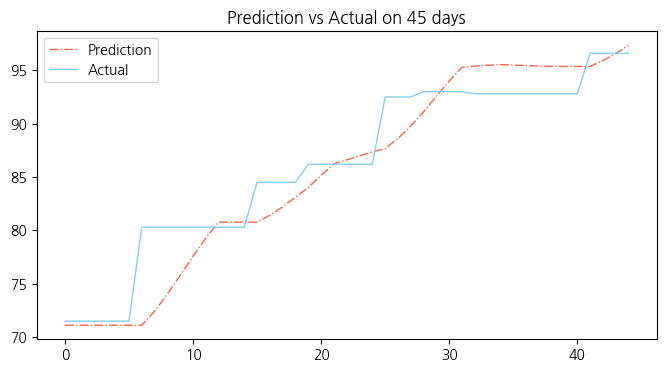

In [21]:
# 예측, 실제 값 비교 시각화
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(8, 4)
ax.plot(preds, color='tomato', linewidth=1.0, label='Prediction', linestyle='-.')
ax.plot(y_trues, color='skyblue', linewidth=1.0, label='Actual')
ax.set_title('Prediction vs Actual on 45 days')
ax.legend()
plt.show()

In [22]:
# train_loader 에 대한 추론
y_trues, preds = src.evaluate(train_loader, model, dataset.get_scaler())

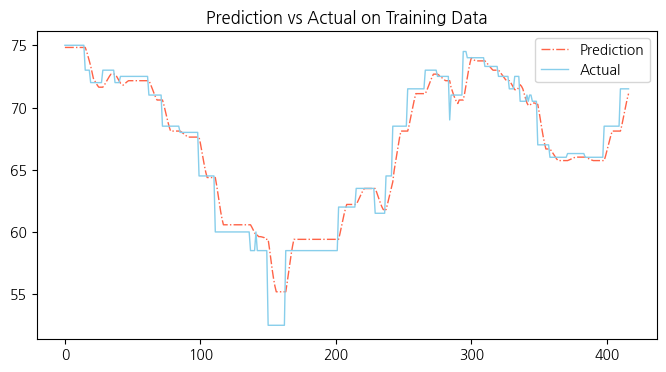

In [23]:
# 예측, 실제 값 비교 시각화
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(8, 4)
ax.plot(preds, color='tomato', linewidth=1.0, label='Prediction', linestyle='-.')
ax.plot(y_trues, color='skyblue', linewidth=1.0, label='Actual')
ax.set_title('Prediction vs Actual on Training Data')
ax.legend()
plt.show()